In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
heart_df = pd.read_csv('/content/drive/MyDrive/Supervised ML/Logistic Regression/processed_cleveland.csv.csv')
print(heart_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  pred_value  
0  0    6           0  
1  3    3           2  
2  2    7           1  
3  0    3           0  
4  0    3           0  


In [3]:
print('>>> Rows <<<')
print(heart_df.count())
print('\n>>> Info <<<')
print(heart_df.info())

>>> Rows <<<
age           303
sex           303
cp            303
trestbps      303
chol          303
fbs           303
restecg       303
thalach       303
exang         303
oldpeak       303
slope         303
ca            303
thal          303
pred_value    303
dtype: int64

>>> Info <<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   cp          303 non-null    int64  
 3   trestbps    303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalach     303 non-null    int64  
 8   exang       303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          303 non-null    object 
 12  thal        303 non-null

In [4]:
print(heart_df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope  pred_value  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

Convert the question mark "?" value in 'ca' & 'thal' columns into NaN

In [5]:
heart_df['ca'] = pd.to_numeric(heart_df['ca'], errors='coerce')
heart_df['thal'] = pd.to_numeric(heart_df['thal'], errors='coerce')

In [6]:
print(heart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   cp          303 non-null    int64  
 3   trestbps    303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalach     303 non-null    int64  
 8   exang       303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          299 non-null    float64
 12  thal        301 non-null    float64
 13  pred_value  303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


Seaborn heatmap visualization for the missing/unkown values

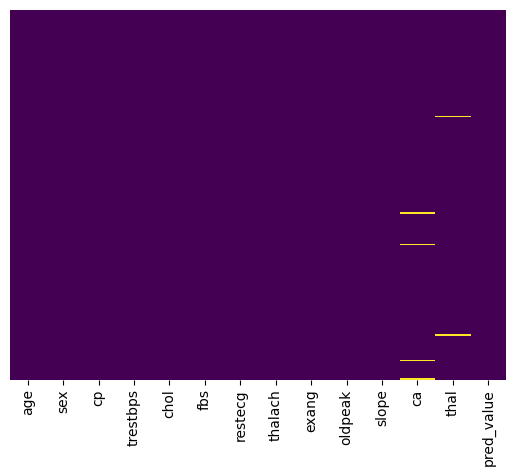

In [7]:
sns.heatmap(heart_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [8]:
heart_df.dropna(inplace=True)

In [9]:
print('>>> Rows <<<')
print(heart_df.count())

>>> Rows <<<
age           297
sex           297
cp            297
trestbps      297
chol          297
fbs           297
restecg       297
thalach       297
exang         297
oldpeak       297
slope         297
ca            297
thal          297
pred_value    297
dtype: int64


split the data for train and test

In [10]:
x_train, x_test, y_train, y_test = train_test_split(heart_df.drop('pred_value', axis=1), heart_df['pred_value'], test_size=0.30, random_state=101)

Create, Train & Test the model

In [11]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

generating the confusion matrix and classification report

In [13]:
pred_result = lr.predict(x_test)
cm = confusion_matrix(y_test, pred_result)
print(cm)

#generating the classification report
c_report = classification_report(y_test, pred_result)
print('\n',c_report)

[[50  1  0  2]
 [11  3  1  4]
 [ 2  2  3  5]
 [ 0  1  4  1]]

               precision    recall  f1-score   support

           0       0.79      0.94      0.86        53
           1       0.43      0.16      0.23        19
           2       0.38      0.25      0.30        12
           3       0.08      0.17      0.11         6

    accuracy                           0.63        90
   macro avg       0.42      0.38      0.38        90
weighted avg       0.61      0.63      0.60        90



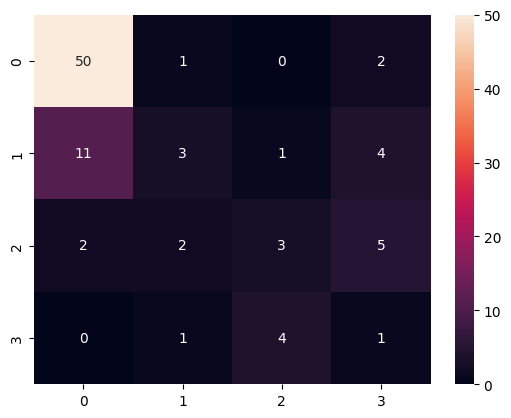

In [14]:
#plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True)
plt.show()